# Notes

We provide this notebook for inference and visualizations. 

You can either load images from a dataloader(see Sec. 1) or from a local path(see Sec. 2).

Welcome to join [IDEA](https://idea.edu.cn/en)([中文网址](https://idea.edu.cn/))!

In [1]:
import os, sys
import torch, json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

from torchvision.transforms import ToPILImage, ToTensor

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 0. Initialize and Load Pre-trained Models

In [2]:
#model_config_path = "config/DINO/custom_DINO_4scale_focalnet_large_fl3.py" # change the path of the model config file
model_config_path = "config/DINO/custom_DINO_4scale_swin_12ep.py"
model_checkpoint_path = "runs/flir/00007/checkpoint_best_regular.pth" # change the path of the model checkpoint
# See our Model Zoo section in README.md for more details about our pretrained models.
args = SLConfig.fromfile(model_config_path) 

In [3]:
args.device = 'cuda' 
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

use_checkpoint!!!!!!!!!!!!!!!!!!!!!!!!


/home/jwchoi/anaconda3/envs/jwc/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
# load coco names
with open('util/coco_id2name.json') as f:
    id2name = json.load(f)
    id2name = {int(k):v for k,v in id2name.items()}

# 1. Visualize images from a dataloader
## 1.1 Load Datasets

In [5]:
args.dataset_file = 'custom'
args.coco_path = "/workspace/data/trainV1" # the path of coco
args.fix_size = False

dataset_train = build_dataset(image_set='train', args=args)   
#dataset_test = build_dataset(image_set='test', args=args)  

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
lookup = [
    {'id': 0, 'name': 'person', 'supercategory': 'none'},
    {'id': 1, 'name': 'bicycle', 'supercategory': 'none'},
    {'id': 2, 'name': 'car', 'supercategory': 'none'},
    {'id': 3, 'name': 'motorcycle', 'supercategory': 'none'},
    {'id': 4, 'name': 'bus', 'supercategory': 'none'},
    {'id': 5, 'name': 'train', 'supercategory': 'none'},
    {'id': 6, 'name': 'truck', 'supercategory': 'none'},
    {'id': 7, 'name': 'traffic light', 'supercategory': 'none'},
    {'id': 8, 'name': 'fire hydrant', 'supercategory': 'none'},
    {'id': 9, 'name': 'street sign', 'supercategory': 'none'},
    {'id': 10, 'name': 'dog', 'supercategory': 'none'},
    {'id': 11, 'name': 'skateboard', 'supercategory': 'none'},
    {'id': 12, 'name': 'stroller', 'supercategory': 'none'},
    {'id': 13, 'name': 'scooter', 'supercategory': 'none'},
    {'id': 14, 'name': 'other vehicle', 'supercategory': 'none'},
]
    
id2name = [x['name'] for x in lookup]

## 1.2 Get an Example and Visualize it

In [6]:
image, targets = dataset_train[0]
#image, targets = dataset_val[250]
#image, targets = dataset_test[0]

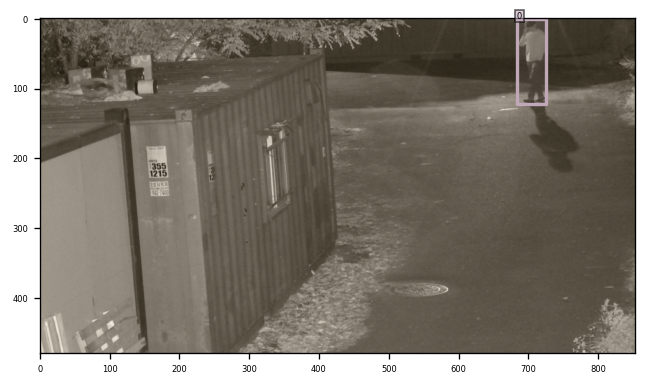

In [7]:
if image.shape[0] == 1:
    visimage = torch.cat([image,]*3, 0)
else:
    visimage = image

# build gt_dict for vis
#box_label = [id2name[int(item)] for item in targets['labels']]
box_label = [int(item) for item in targets['labels']]
gt_dict = {
    'boxes': targets['boxes'],
    'image_id': targets['image_id'],
    'size': targets['size'],
    'box_label': box_label,
}
vslzr = COCOVisualizer()
vslzr.visualize(visimage, gt_dict, savedir=None)

In [88]:
gt_dict

{'boxes': tensor([[0.7554, 0.5445, 0.0493, 0.1659]]),
 'image_id': tensor([0]),
 'size': tensor([800, 800]),
 'box_label': [2]}

In [11]:
allimgs = dataset_val.coco.getImgIds()

In [14]:
img = dataset_val.coco.loadImgs([0])

In [6]:
targets

{'boxes': tensor([[0.0375, 0.5283, 0.0750, 0.2559],
         [0.2680, 0.4951, 0.1172, 0.1152],
         [0.3391, 0.4785, 0.0531, 0.0703],
         [0.3719, 0.4795, 0.0281, 0.0371],
         [0.4672, 0.4980, 0.1094, 0.1094]]),
 'labels': tensor([2, 2, 2, 2, 2]),
 'image_id': tensor([250]),
 'area': tensor([11888.2500,  8366.0156,  2314.1250,   646.5938,  7411.2500]),
 'iscrowd': tensor([0, 0, 0, 0, 0]),
 'orig_size': tensor([512, 640]),
 'size': tensor([704, 880])}

In [11]:
ann = dataset_val.coco.loadAnns(dataset_val.coco.getAnnIds(imgIds=[250]))

In [7]:
img = dataset_val.coco.loadImgs([250])

In [12]:
img, ann

([{'id': 250,
   'license': 1,
   'file_name': 'FLIR_09230_PreviewData.jpeg',
   'height': 512,
   'width': 640}],
 [{'id': 2423,
   'image_id': 250,
   'category_id': 2,
   'bbox': [0.0, 205.0, 48.0, 131.0],
   'area': 6288.0,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 2424,
   'image_id': 250,
   'category_id': 2,
   'bbox': [134.0, 224.0, 75.0, 59.0],
   'area': 4425.0,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 2425,
   'image_id': 250,
   'category_id': 2,
   'bbox': [200.0, 227.0, 34.0, 36.0],
   'area': 1224.0,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 2426,
   'image_id': 250,
   'category_id': 2,
   'bbox': [229.0, 236.0, 18.0, 19.0],
   'area': 342.0,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 2427,
   'image_id': 250,
   'category_id': 2,
   'bbox': [264.0, 227.0, 70.0, 56.0],
   'area': 3920.0,
   'segmentation': [],
   'iscrowd': 0}])

In [ ]:
            id = self.ids[idx]
            img = self._load_image(id)
            target = self._load_target(id)
        except:
            print("Error idx: {}".format(idx))
            idx += 1
            id = self.ids[idx]
            img = self._load_image(id)
            target = self._load_target(id)
                        
        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        img, target = self.prepare(img, target)

In [13]:
idx = 250
cid = dataset_val.ids[idx]
cimg = dataset_val._load_image(cid)
ctarget = dataset_val._load_target(cid)

In [14]:
ctarget

[{'id': 2423,
  'image_id': 250,
  'category_id': 2,
  'bbox': [0.0, 205.0, 48.0, 131.0],
  'area': 6288.0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2424,
  'image_id': 250,
  'category_id': 2,
  'bbox': [134.0, 224.0, 75.0, 59.0],
  'area': 4425.0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2425,
  'image_id': 250,
  'category_id': 2,
  'bbox': [200.0, 227.0, 34.0, 36.0],
  'area': 1224.0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2426,
  'image_id': 250,
  'category_id': 2,
  'bbox': [229.0, 236.0, 18.0, 19.0],
  'area': 342.0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2427,
  'image_id': 250,
  'category_id': 2,
  'bbox': [264.0, 227.0, 70.0, 56.0],
  'area': 3920.0,
  'segmentation': [],
  'iscrowd': 0}]

In [15]:
cimage_id = dataset_val.ids[idx]
ctarget = {'image_id': cimage_id, 'annotations': ctarget}
cimg2, ctarget2 = dataset_val.prepare(cimg, ctarget)

In [16]:
ctarget2

{'boxes': tensor([[  0., 205.,  48., 336.],
         [134., 224., 209., 283.],
         [200., 227., 234., 263.],
         [229., 236., 247., 255.],
         [264., 227., 334., 283.]]),
 'labels': tensor([2, 2, 2, 2, 2]),
 'image_id': tensor([250]),
 'area': tensor([6288., 4425., 1224.,  342., 3920.]),
 'iscrowd': tensor([0, 0, 0, 0, 0]),
 'orig_size': tensor([512, 640]),
 'size': tensor([512, 640])}

In [17]:
cfimg, cftarget = dataset_val._transforms(cimg2, ctarget2)

In [18]:
cftarget

{'boxes': tensor([[0.0375, 0.5283, 0.0750, 0.2559],
         [0.2680, 0.4951, 0.1172, 0.1152],
         [0.3391, 0.4785, 0.0531, 0.0703],
         [0.3719, 0.4795, 0.0281, 0.0371],
         [0.4672, 0.4980, 0.1094, 0.1094]]),
 'labels': tensor([2, 2, 2, 2, 2]),
 'image_id': tensor([250]),
 'area': tensor([11888.2500,  8366.0156,  2314.1250,   646.5938,  7411.2500]),
 'iscrowd': tensor([0, 0, 0, 0, 0]),
 'orig_size': tensor([512, 640]),
 'size': tensor([704, 880])}

## 1.3 Visualize Model Predictions

In [13]:
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

In [14]:
thershold = 0.3 # set a thershold

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


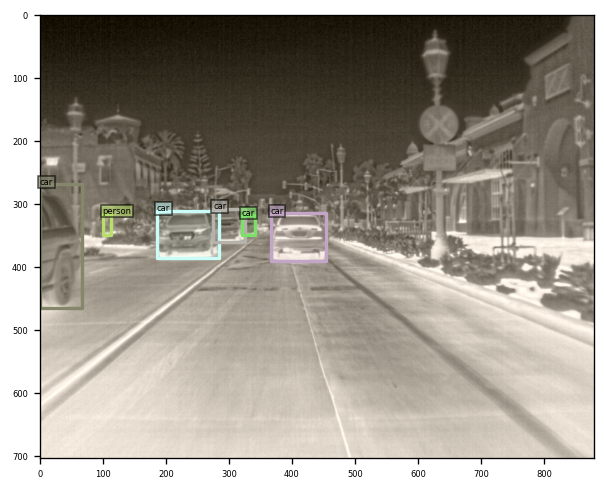

In [15]:
box_label = [id2name[int(item)] for item in labels[select_mask]]
#box_label = [int(item) for item in labels[select_mask]]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': targets['size'],
    'box_label': box_label
}
vslzr.visualize(visimage, pred_dict, savedir=None)

# 2. Visualize Custom Images

In [5]:
from PIL import Image
import datasets.transforms as T

In [6]:
image = Image.open("./figs/idea.jpg").convert("RGB") # load image

In [7]:
# transform images
transform = T.Compose([
    T.RandomResize([800], max_size=1333),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image, _ = transform(image, None)

In [ ]:
# predict images
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

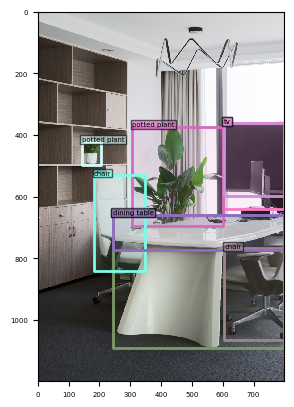

In [9]:
# visualize outputs
thershold = 0.3 # set a thershold

vslzr = COCOVisualizer()

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

box_label = [id2name[int(item)] for item in labels[select_mask]]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': torch.Tensor([image.shape[1], image.shape[2]]),
    'box_label': box_label
}
vslzr.visualize(image, pred_dict, savedir=None, dpi=100)

In [2]:
import torch

In [6]:
ckpt = torch.load('runs/prelim/00002/checkpoint.pth', map_location='cpu')

In [7]:
ckpt.keys()

dict_keys(['model', 'optimizer', 'lr_scheduler', 'epoch', 'args'])

In [8]:
ckpt['epoch']

11

In [10]:
ckpt2 = torch.load('runs/prelim/00002/eval/latest.pth', map_location='cpu')

In [11]:
ckpt2.keys()

dict_keys(['params', 'counts', 'date', 'precision', 'recall', 'scores'])

In [13]:
ckpt2['scores'].shape

(10, 101, 3, 4, 3)

In [14]:
ckpt2['counts']

[10, 101, 3, 4, 3]

In [17]:
ckpt2['params'].__dict__

{'imgIds': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 'catIds': [0, 1, 2],
 'iouThrs': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'recThrs': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.9

# FLIR to COCO

In [1]:
import json, yaml, os
import numpy as np
import glob
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import shutil
from tqdm.autonotebook import tqdm

from torchvision.transforms import ToTensor

from pycocotools.coco import COCO

/tmp/ipykernel_1857859/3069492139.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [145]:
datadirbase = '/home/jwchoi/Downloads/FLIRaligned/align'

In [153]:
keys_train = []
with open(os.path.join(datadirbase, 'align_train.txt'), 'r') as f:
    for line in f.readlines():
        keys_train.append(line.strip())
        
keys_valid = []
with open(os.path.join(datadirbase, 'align_validation.txt'), 'r') as f:
    for line in f.readlines():
        keys_valid.append(line.strip())

In [154]:
dir_train = os.path.join(datadirbase, 'train')
dir_valid = os.path.join(datadirbase, 'valid')
os.makedirs(dir_train, exist_ok=True)
os.makedirs(dir_valid, exist_ok=True)

In [155]:
imagedirbase = '/home/jwchoi/Downloads/FLIRaligned/align/JPEGImages'
annotdirbase = '/home/jwchoi/Downloads/FLIRaligned/align/Annotations'

In [158]:
for k in tqdm(keys_train):
    src = os.path.join(imagedirbase, f'{k}.jpeg')
    dst = os.path.join(dir_train, f'{k}.jpeg')
    shutil.copy(src, dst)

  0%|          | 0/4129 [00:00<?, ?it/s]

In [159]:
for k in tqdm(keys_valid):
    src = os.path.join(imagedirbase, f'{k}.jpeg')
    dst = os.path.join(dir_valid, f'{k}.jpeg')
    shutil.copy(src, dst)

  0%|          | 0/1013 [00:00<?, ?it/s]

In [163]:
def find_image_id(key, images, extension='.jpeg'):
    for x in images:
        if x['file_name'].split(extension)[0] == key:
            return x['id']
    return None

def find_cat_id(name, categories):
    for x in categories:
        if x['name'] == name:
            return x['id']
    return None

def find_cat_name(idx, categories):
    for x in categories:
        if x['id'] == idx:
            return x['name']
    return None

In [178]:
#dir_X = dir_train
dir_X = dir_valid

In [179]:
imgfiles = sorted(glob.glob(os.path.join(dir_X, '*.jpeg')))
keys = [os.path.basename(x).split('.jpeg')[0] for x in imgfiles]
print(len(keys), len(keys_valid))

1013 1013


In [180]:
dsannot = {
    'info': {},
    'license':[{'id': 1, 'url': '', 'name': 'Unknown'}],
    'categories': [
        {'id': 0, 'name': 'person', 'supercategory': 'none'},
        {'id': 1, 'name': 'bicycle', 'supercategory': 'none'},
        {'id': 2, 'name': 'car', 'supercategory': 'none'},
        {'id': 3, 'name': 'motorcycle', 'supercategory': 'none'},
        {'id': 4, 'name': 'bus', 'supercategory': 'none'},
        {'id': 5, 'name': 'train', 'supercategory': 'none'},
        {'id': 6, 'name': 'truck', 'supercategory': 'none'},
        {'id': 7, 'name': 'traffic light', 'supercategory': 'none'},
        {'id': 8, 'name': 'fire hydrant', 'supercategory': 'none'},
        {'id': 9, 'name': 'street sign', 'supercategory': 'none'},
        {'id': 10, 'name': 'dog', 'supercategory': 'none'},
        {'id': 11, 'name': 'skateboard', 'supercategory': 'none'},
        {'id': 12, 'name': 'stroller', 'supercategory': 'none'},
        {'id': 13, 'name': 'scooter', 'supercategory': 'none'},
        {'id': 14, 'name': 'other vehicle', 'supercategory': 'none'},
    ],
}

In [181]:
dsannot_images = []
cnt = 0
for x in tqdm(imgfiles):
    im = Image.open(x)
    w, h = im.size
    dsannot_images.append({
        'id': cnt,
        'license': 1,
        'file_name': os.path.basename(x),
        'height': h,
        'width': w,
    })
    cnt += 1
dsannot['images'] = dsannot_images

annots = []
cnt = 0
for k in tqdm(keys):
    annotfile = os.path.join(annotbase, f'{k}.xml')
    tree = ET.parse(annotfile)
    root = tree.getroot()
    
    image_id = find_image_id(k, dsannot['images'])
    if image_id is None:
        print(f'cannot find image_id for {k}')
        continue
    
    for x in root.iter('object'):
        
        cat_name = None
        xmin = None
        ymin = None
        xmax = None
        ymax = None
        for c in x:
            if c.tag == 'name':
                cat_name = c.text
            if c.tag == 'bndbox':
                for m in c:
                    if m.tag == 'xmin':
                        xmin = float(m.text)
                    elif m.tag == 'xmax':
                        xmax = float(m.text)
                    elif m.tag == 'ymin':
                        ymin = float(m.text)
                    elif m.tag == 'ymax':
                        ymax = float(m.text)
        
        cat_id = find_cat_id(cat_name, dsannot['categories'])
        if cat_id is None:
            print(f'cannot find cat_id for {cat_name}')
            continue
            
        cannot = {
            'id': cnt,
            'image_id': image_id,
            'category_id': cat_id,
            'bbox': [xmin, ymin, xmax-xmin, ymax-ymin],
            'area': (xmax-xmin)*(ymax-ymin),
            'segmentation': [],
            'iscrowd': 0
        }
        annots.append(cannot)
        
        cnt += 1 
dsannot['annotations'] = annots

with open(os.path.join(dir_X, '_annotations.coco.json'), 'w') as f:
    json.dump(dsannot, f)

  0%|          | 0/1013 [00:00<?, ?it/s]

  0%|          | 0/1013 [00:00<?, ?it/s]

In [184]:
os.path.join(dir_train, '_annotations.coco.json')

'/home/jwchoi/Downloads/FLIRaligned/align/train/_annotations.coco.json'

In [2]:
checkcoco = COCO('/home/jwchoi/Downloads/FLIRaligned/align/valid/_annotations.coco.json')

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [3]:
checkcoco

In [6]:
res = COCO()

In [7]:
res.dataset

{}

In [ ]:
res.dataset['images'] = [img for img in self.dataset['images']]
AttributeError: 'NoneType' object has no attribute 'dataset'

In [188]:
imgIds = checkcoco.getImgIds()

In [194]:
widths = []
heights = []
for x in checkcoco.loadImgs(imgIds):
    widths.append(x['width'])
    heights.append(x['height'])

In [196]:
np.min(heights), np.max(heights)

(512, 512)

In [114]:
import json, yaml, os
import numpy as np
import glob
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
from tqdm.autonotebook import tqdm

from torchvision.transforms import ToTensor

In [2]:
datadirbase = '/home/jwchoi/Downloads/FLIRaligned/align/JPEGImages'

In [3]:
annotbase = '/home/jwchoi/Downloads/FLIRaligned/align/Annotations'

In [46]:
dsannot = {
    'info': {},
    'license':[{'id': 1, 'url': '', 'name': 'Unknown'}],
    'categories': [
        {'id': 0, 'name': 'person', 'supercategory': 'none'},
        {'id': 1, 'name': 'bicycle', 'supercategory': 'none'},
        {'id': 2, 'name': 'car', 'supercategory': 'none'},
        {'id': 3, 'name': 'motorcycle', 'supercategory': 'none'},
        {'id': 4, 'name': 'bus', 'supercategory': 'none'},
        {'id': 5, 'name': 'train', 'supercategory': 'none'},
        {'id': 6, 'name': 'truck', 'supercategory': 'none'},
        {'id': 7, 'name': 'traffic light', 'supercategory': 'none'},
        {'id': 8, 'name': 'fire hydrant', 'supercategory': 'none'},
        {'id': 9, 'name': 'street sign', 'supercategory': 'none'},
        {'id': 10, 'name': 'dog', 'supercategory': 'none'},
        {'id': 11, 'name': 'skateboard', 'supercategory': 'none'},
        {'id': 12, 'name': 'stroller', 'supercategory': 'none'},
        {'id': 13, 'name': 'scooter', 'supercategory': 'none'},
        {'id': 14, 'name': 'other vehicle', 'supercategory': 'none'},
    ],
}

In [47]:
imgfiles = sorted(glob.glob(os.path.join(datadirbase, '*PreviewData.jpeg')))
keys = [os.path.basename(x).split('.jpeg')[0] for x in imgfiles]

In [48]:
dsannot_images = []
cnt = 0
for x in tqdm(imgfiles):
    im = Image.open(x)
    w, h = im.size
    dsannot_images.append({
        'id': cnt,
        'license': 1,
        'file_name': os.path.basename(x),
        'height': h,
        'width': w,
    })
    cnt += 1
dsannot['images'] = dsannot_images

  0%|          | 0/5142 [00:00<?, ?it/s]

In [140]:
def find_image_id(key, images, extension='.jpeg'):
    for x in images:
        if x['file_name'].split(extension)[0] == key:
            return x['id']
    return None

def find_cat_id(name, categories):
    for x in categories:
        if x['name'] == name:
            return x['id']
    return None

def find_cat_name(idx, categories):
    for x in categories:
        if x['id'] == idx:
            return x['name']
    return None

In [50]:
annots = []
cnt = 0
for k in tqdm(keys):
    annotfile = os.path.join(annotbase, f'{k}.xml')
    tree = ET.parse(annotfile)
    root = tree.getroot()
    
    image_id = find_image_id(k, dsannot['images'])
    if image_id is None:
        print(f'cannot find image_id for {k}')
        continue
    
    for x in root.iter('object'):
        
        cat_name = None
        xmin = None
        ymin = None
        xmax = None
        ymax = None
        for c in x:
            if c.tag == 'name':
                cat_name = c.text
            if c.tag == 'bndbox':
                for m in c:
                    if m.tag == 'xmin':
                        xmin = float(m.text)
                    elif m.tag == 'xmax':
                        xmax = float(m.text)
                    elif m.tag == 'ymin':
                        ymin = float(m.text)
                    elif m.tag == 'ymax':
                        ymax = float(m.text)
        
        cat_id = find_cat_id(cat_name, dsannot['categories'])
        if cat_id is None:
            print(f'cannot find cat_id for {cat_name}')
            continue
            
        cannot = {
            'id': cnt,
            'image_id': image_id,
            'category_id': cat_id,
            'bbox': [xmin, ymin, xmax-xmin, ymax-ymin],
            'area': (xmax-xmin)*(ymax-ymin),
            'segmentation': [],
            'iscrowd': 0
        }
        annots.append(cannot)
        
        cnt += 1 
dsannot['annotations'] = annots

  0%|          | 0/5142 [00:00<?, ?it/s]

In [52]:
with open('flir_ds.json', 'w') as f:
    json.dump(dsannot, f)

In [53]:
from pycocotools.coco import COCO

In [55]:
coco = COCO('flir_ds.json')

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [68]:
catIds = coco.getCatIds(catNms=['dog', 'person'])
imgIds = coco.getImgIds(catIds=catIds)

In [89]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [124]:
imgpath = os.path.join(datadirbase, img['file_name'])
imgpil = Image.open(imgpath)

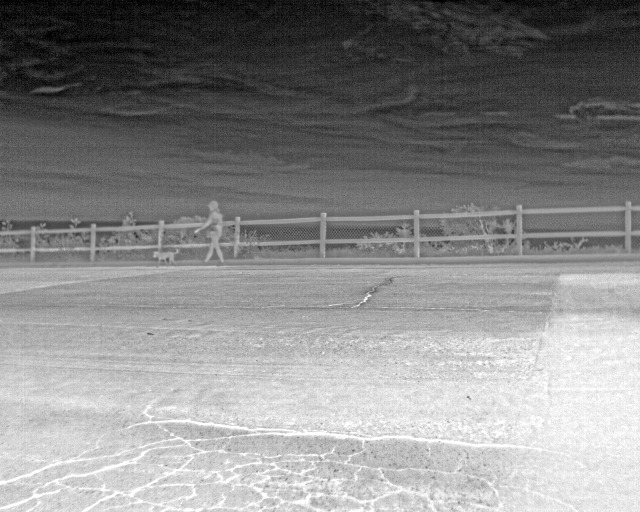

In [137]:
imgpil

In [122]:
draw = ImageDraw.Draw(imgpil)
draw.rectangle(
    (anns[0]['bbox'][0], anns[0]['bbox'][1], anns[0]['bbox'][0]+anns[0]['bbox'][2], anns[0]['bbox'][1] + anns[0]['bbox'][3]))
draw.rectangle(
    (anns[1]['bbox'][0], anns[1]['bbox'][1], anns[1]['bbox'][0]+anns[1]['bbox'][2], anns[1]['bbox'][1] + anns[1]['bbox'][3]))


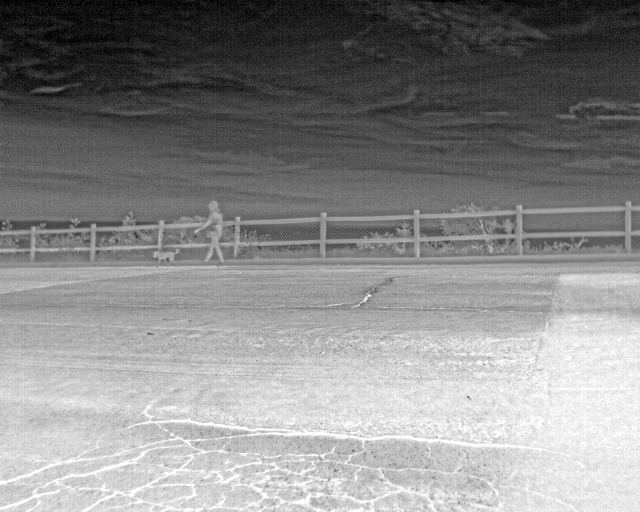

In [143]:
imgpil.convert('RGB')

In [141]:
timg = ToTensor()(imgpil.convert('RGB'))
img_size = torch.tensor([img['height'], img['width']])
img_id = torch.tensor([img['id']])

c_boxes = []
c_box_label = []
for box in anns:
    xmin, ymin, w, h = box['bbox']
    xmin = xmin / img_size[1]
    w = w / img_size[1]
    ymin = ymin / img_size[0]
    h = h / img_size[0]
    cx = xmin + 0.5*w
    cy = ymin + 0.5*h
    
    
    c_boxes.append([cx, cy, w, h])
    c_box_label.append(find_cat_name(box['category_id'], dsannot['categories']))

c_boxes = torch.tensor(c_boxes)
#c_box_label = torch.tensor(c_box_label)

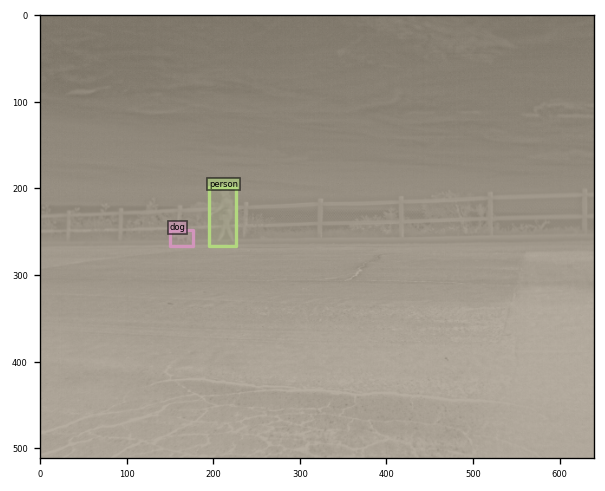

In [142]:
current_dict = {
    'boxes': c_boxes,
    'image_id': img_id,
    'size': img_size,
    'box_label': c_box_label,
}
vslzr = COCOVisualizer()
vslzr.visualize(timg, current_dict, savedir=None)

In [134]:
current_dict

{'boxes': tensor([[0.2344, 0.4844, 0.0422, 0.0352],
         [0.3047, 0.3867, 0.0484, 0.1328]]),
 'image_id': tensor([2142]),
 'size': tensor([512, 640]),
 'box_label': [10, 0]}

In [135]:
150/640

0.234375

In [100]:
img

{'id': 2142,
 'license': 1,
 'file_name': 'FLIR_03506_PreviewData.jpeg',
 'height': 512,
 'width': 640}

In [102]:
anns

[{'id': 17840,
  'image_id': 2142,
  'category_id': 10,
  'bbox': [150.0, 248.0, 27.0, 18.0],
  'area': 486.0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 17841,
  'image_id': 2142,
  'category_id': 0,
  'bbox': [195.0, 198.0, 31.0, 68.0],
  'area': 2108.0,
  'segmentation': [],
  'iscrowd': 0}]

In [ ]:
box_label = [int(item) for item in targets['labels']]
gt_dict = {
    'boxes': targets['boxes'],
    'image_id': targets['image_id'],
    'size': targets['size'],
    'box_label': box_label,
}
vslzr = COCOVisualizer()
vslzr.visualize(image, gt_dict, savedir=None)

In [99]:
timg.shape

torch.Size([1, 512, 640])

In [92]:
gt_dict

{'boxes': tensor([[0.7554, 0.5445, 0.0493, 0.1659]]),
 'image_id': tensor([0]),
 'size': tensor([800, 800]),
 'box_label': [2]}

In [24]:
{'id': 0,
  'image_id': 0,
  'category_id': 2,
  'bbox': [255, 206, 27, 41.5],
  'area': 1120.5,
  'segmentation': [],
  'iscrowd': 0},

[]

In [94]:
image.shape

torch.Size([3, 800, 800])

In [80]:
anns

[{'id': 18008,
  'image_id': 2168,
  'category_id': 0,
  'bbox': [349.0, 241.0, 43.0, 90.0],
  'area': 3870.0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 18009,
  'image_id': 2168,
  'category_id': 10,
  'bbox': [301.0, 297.0, 55.0, 37.0],
  'area': 2035.0,
  'segmentation': [],
  'iscrowd': 0}]

In [81]:
dsannot['categories']

[{'id': 0, 'name': 'person', 'supercategory': 'none'},
 {'id': 1, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 2, 'name': 'car', 'supercategory': 'none'},
 {'id': 3, 'name': 'motorcycle', 'supercategory': 'none'},
 {'id': 4, 'name': 'bus', 'supercategory': 'none'},
 {'id': 5, 'name': 'train', 'supercategory': 'none'},
 {'id': 6, 'name': 'truck', 'supercategory': 'none'},
 {'id': 7, 'name': 'traffic light', 'supercategory': 'none'},
 {'id': 8, 'name': 'fire hydrant', 'supercategory': 'none'},
 {'id': 9, 'name': 'street sign', 'supercategory': 'none'},
 {'id': 10, 'name': 'dog', 'supercategory': 'none'},
 {'id': 11, 'name': 'skateboard', 'supercategory': 'none'},
 {'id': 12, 'name': 'stroller', 'supercategory': 'none'},
 {'id': 13, 'name': 'scooter', 'supercategory': 'none'},
 {'id': 14, 'name': 'other vehicle', 'supercategory': 'none'}]

In [47]:
for child in root:
     print(child.tag, child.attrib)

folder {}
source {}
owner {}
filename {}
size {}
object {}
object {}
object {}
object {}
object {}
object {}


In [23]:
dfc['info']

{'year': '2020',
 'version': '1',
 'description': 'Exported from roboflow.ai',
 'contributor': '',
 'url': 'https://public.roboflow.ai/object-detection/undefined',
 'date_created': '2020-05-25T00:08:21+00:00'}

In [ ]:
# "bbox" : [x,y,width,height], 
'''
0 Person
1 Bike
2 Car
3 Motorcycle
4 Bus
5 Train
6 Truck
7 Traffic light
8 Fire Hydrant
9 Street Sign
10 Dog
11 Skateboard
12 Stroller
13 Scooter
14 Other Vehicle
'''

# COCO json format

In [11]:
import json
with open('/home/jwchoi/Downloads/thermaldogpeople/train/_annotations.coco.json', 'rb') as f:
    dfc = json.load(f)

In [12]:
dfc.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [13]:
dfc['licenses']

[{'id': 1, 'url': '', 'name': 'Unknown'}]

In [19]:
dfc['categories']

[{'id': 0, 'name': 'dogs-person', 'supercategory': 'none'},
 {'id': 1, 'name': 'dog', 'supercategory': 'dogs-person'},
 {'id': 2, 'name': 'person', 'supercategory': 'dogs-person'}]

In [20]:
dfc['images']

[{'id': 0,
  'license': 1,
  'file_name': 'IMG_0094_jpg.rf.03dbd175cdbd5379608debcc783a5361.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2020-05-25T00:08:21+00:00'},
 {'id': 1,
  'license': 1,
  'file_name': 'IMG_0054_jpg.rf.03e0fd11bad6afeb085f2f156d7fd043.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2020-05-25T00:08:21+00:00'},
 {'id': 2,
  'license': 1,
  'file_name': 'IMG_0056_jpg.rf.0255dca8946ea0a34592394acd67b11b.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2020-05-25T00:08:21+00:00'},
 {'id': 3,
  'license': 1,
  'file_name': 'IMG_0109_jpg.rf.03607def018d49330ebef9a856f65812.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2020-05-25T00:08:21+00:00'},
 {'id': 4,
  'license': 1,
  'file_name': 'IMG_0112_jpg.rf.016d04c2af3bc0221a5153d6af8b9f30.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2020-05-25T00:08:21+00:00'},
 {'id': 5,
  'license': 1,
  'file_name': 'IMG_0064_jpg.rf.07406ea9809d2492712b3e2fa3a857b3.jpg',
  

In [ ]:
dfc['annotations']

# Scrap

In [4]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
datadir = '/home/jwchoi/Downloads/FLIRaligned/align/JPEGImages'

In [5]:
tpath = os.path.join(datadir, 'FLIR_02612_PreviewData.jpeg')
#tpath = os.path.join(datadir, 'FLIR_02612_RGB.jpg')

In [6]:
tim = Image.open(tpath)

In [9]:
np.array(tim).shape

(512, 640)

In [183]:
np.mean([0.485, 0.456, 0.406]), np.mean([0.229, 0.224, 0.225])

(0.449, 0.226)

In [1]:
import torch

In [2]:
ckpt = torch.load('temp/pretrained/dino/checkpoint0029_4scale_swin.pth', map_location='cpu')

In [4]:
ckpt = torch.load('temp/pretrained/swin_large_patch4_window12_384_22k.pth', map_location='cpu')

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [1]:
import torch
import numpy as np
from pycocotools.cocoeval import COCOeval

In [2]:
class coco_metrics(object):
    def __init__(self, filepath):
        mets = torch.load(filepath, map_location='cpu')
        self.eval = mets
        self.params = mets['params']
        
    def summarize(self):
        '''
        Compute and display summary metrics for evaluation results.
        Note this functin can *only* be applied on the default parameter setting
        '''
        def _summarize( ap=1, iouThr=None, areaRng='all', maxDets=100 ):
            p = self.params
            iStr = ' {:<18} {} @[ IoU={:<9} | area={:>6s} | maxDets={:>3d} ] = {:0.3f}'
            titleStr = 'Average Precision' if ap == 1 else 'Average Recall'
            typeStr = '(AP)' if ap==1 else '(AR)'
            iouStr = '{:0.2f}:{:0.2f}'.format(p.iouThrs[0], p.iouThrs[-1]) \
                if iouThr is None else '{:0.2f}'.format(iouThr)

            aind = [i for i, aRng in enumerate(p.areaRngLbl) if aRng == areaRng]
            mind = [i for i, mDet in enumerate(p.maxDets) if mDet == maxDets]
            if ap == 1:
                # dimension of precision: [TxRxKxAxM]
                s = self.eval['precision']
                # IoU
                if iouThr is not None:
                    t = np.where(iouThr == p.iouThrs)[0]
                    s = s[t]
                s = s[:,:,:,aind,mind]
            else:
                # dimension of recall: [TxKxAxM]
                s = self.eval['recall']
                if iouThr is not None:
                    t = np.where(iouThr == p.iouThrs)[0]
                    s = s[t]
                s = s[:,:,aind,mind]
            if len(s[s>-1])==0:
                mean_s = -1
            else:
                mean_s = np.mean(s[s>-1])
            print(iStr.format(titleStr, typeStr, iouStr, areaRng, maxDets, mean_s))
            return mean_s
        def _summarizeDets():
            stats = np.zeros((12,))
            stats[0] = _summarize(1)
            stats[1] = _summarize(1, iouThr=.5, maxDets=self.params.maxDets[2])
            stats[2] = _summarize(1, iouThr=.75, maxDets=self.params.maxDets[2])
            stats[3] = _summarize(1, areaRng='small', maxDets=self.params.maxDets[2])
            stats[4] = _summarize(1, areaRng='medium', maxDets=self.params.maxDets[2])
            stats[5] = _summarize(1, areaRng='large', maxDets=self.params.maxDets[2])
            stats[6] = _summarize(0, maxDets=self.params.maxDets[0])
            stats[7] = _summarize(0, maxDets=self.params.maxDets[1])
            stats[8] = _summarize(0, maxDets=self.params.maxDets[2])
            stats[9] = _summarize(0, areaRng='small', maxDets=self.params.maxDets[2])
            stats[10] = _summarize(0, areaRng='medium', maxDets=self.params.maxDets[2])
            stats[11] = _summarize(0, areaRng='large', maxDets=self.params.maxDets[2])
            return stats
        def _summarizeKps():
            stats = np.zeros((10,))
            stats[0] = _summarize(1, maxDets=20)
            stats[1] = _summarize(1, maxDets=20, iouThr=.5)
            stats[2] = _summarize(1, maxDets=20, iouThr=.75)
            stats[3] = _summarize(1, maxDets=20, areaRng='medium')
            stats[4] = _summarize(1, maxDets=20, areaRng='large')
            stats[5] = _summarize(0, maxDets=20)
            stats[6] = _summarize(0, maxDets=20, iouThr=.5)
            stats[7] = _summarize(0, maxDets=20, iouThr=.75)
            stats[8] = _summarize(0, maxDets=20, areaRng='medium')
            stats[9] = _summarize(0, maxDets=20, areaRng='large')
            return stats
        if not self.eval:
            raise Exception('Please run accumulate() first')
        iouType = self.params.iouType
        if iouType == 'segm' or iouType == 'bbox':
            summarize = _summarizeDets
        elif iouType == 'keypoints':
            summarize = _summarizeKps
        self.stats = summarize()

In [4]:
mets = coco_metrics('runs/flir/00001/eval/latest.pth')
mets.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.299
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.592
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.262
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.230
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.341
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.539
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.442
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.496
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.432
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.516
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.695


In [18]:
#mets = coco_metrics('runs/flir/00002/eval/latest.pth')
mets = coco_metrics('runs/flir/00002/eval.pth')
mets.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.382
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.702
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.364
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.450
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.671
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.248
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.506
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.559
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.503
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.775


In [4]:
#mets = coco_metrics('runs/flir/00004/eval/latest.pth')
mets = coco_metrics('runs/flir/00004/eval.pth')
mets.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.379
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.674
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.363
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.444
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.219
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.496
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.450
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.561
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.751


In [4]:
#mets = coco_metrics('runs/flir/00006/eval/latest.pth')
mets = coco_metrics('runs/flir/00006/eval.pth')
mets.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.383
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.689
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.386
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.310
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.427
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.611
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.209
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.497
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.533
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.549
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.764


In [5]:
mets = coco_metrics('runs/flir/00007/eval/latest.pth')
#mets = coco_metrics('runs/flir/00007/best_eval/eval.pth')
mets.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.360
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.665
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.344
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.262
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.416
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.613
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.485
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.518
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.511
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.525
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.724


In [4]:
mets = coco_metrics('runs/flir/00008/eval/latest.pth')
#mets = coco_metrics('runs/flir/00008/best_eval/eval.pth')
mets.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.674
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.364
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.420
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.491
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.536
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.467
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.564
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.747


In [16]:
import numpy as np

In [22]:
scales = [480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800]

In [25]:
np.partition(scales, -4)[-4]

704

In [ ]:
np.partition(k.flatten(), -2)[-2]

In [2]:
mets = torch.load('runs/prelim/00006/eval/latest.pth', map_location='cpu')

In [3]:
mets.keys()

dict_keys(['params', 'counts', 'date', 'precision', 'recall', 'scores'])

In [5]:
mets['scores'].shape

(10, 101, 15, 4, 3)

In [8]:
mets['precision'].shape

(10, 101, 15, 4, 3)

In [10]:
mets['params']

In [ ]:
    def summarize(self):
        '''
        Compute and display summary metrics for evaluation results.
        Note this functin can *only* be applied on the default parameter setting
        '''
        def _summarize( ap=1, iouThr=None, areaRng='all', maxDets=100 ):
            p = self.params
            iStr = ' {:<18} {} @[ IoU={:<9} | area={:>6s} | maxDets={:>3d} ] = {:0.3f}'
            titleStr = 'Average Precision' if ap == 1 else 'Average Recall'
            typeStr = '(AP)' if ap==1 else '(AR)'
            iouStr = '{:0.2f}:{:0.2f}'.format(p.iouThrs[0], p.iouThrs[-1]) \
                if iouThr is None else '{:0.2f}'.format(iouThr)

            aind = [i for i, aRng in enumerate(p.areaRngLbl) if aRng == areaRng]
            mind = [i for i, mDet in enumerate(p.maxDets) if mDet == maxDets]
            if ap == 1:
                # dimension of precision: [TxRxKxAxM]
                s = self.eval['precision']
                # IoU
                if iouThr is not None:
                    t = np.where(iouThr == p.iouThrs)[0]
                    s = s[t]
                s = s[:,:,:,aind,mind]
            else:
                # dimension of recall: [TxKxAxM]
                s = self.eval['recall']
                if iouThr is not None:
                    t = np.where(iouThr == p.iouThrs)[0]
                    s = s[t]
                s = s[:,:,aind,mind]
            if len(s[s>-1])==0:
                mean_s = -1
            else:
                mean_s = np.mean(s[s>-1])
            print(iStr.format(titleStr, typeStr, iouStr, areaRng, maxDets, mean_s))
            return mean_s
        def _summarizeDets():
            stats = np.zeros((12,))
            stats[0] = _summarize(1)
            stats[1] = _summarize(1, iouThr=.5, maxDets=self.params.maxDets[2])
            stats[2] = _summarize(1, iouThr=.75, maxDets=self.params.maxDets[2])
            stats[3] = _summarize(1, areaRng='small', maxDets=self.params.maxDets[2])
            stats[4] = _summarize(1, areaRng='medium', maxDets=self.params.maxDets[2])
            stats[5] = _summarize(1, areaRng='large', maxDets=self.params.maxDets[2])
            stats[6] = _summarize(0, maxDets=self.params.maxDets[0])
            stats[7] = _summarize(0, maxDets=self.params.maxDets[1])
            stats[8] = _summarize(0, maxDets=self.params.maxDets[2])
            stats[9] = _summarize(0, areaRng='small', maxDets=self.params.maxDets[2])
            stats[10] = _summarize(0, areaRng='medium', maxDets=self.params.maxDets[2])
            stats[11] = _summarize(0, areaRng='large', maxDets=self.params.maxDets[2])
            return stats